In [1]:
import numpy as np
from glob import glob
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# resize all the image to a fixed size
image_size = [224,224]

In [3]:
train_path = 'dataset/train'
valid_path = 'dataset/test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape =image_size+[3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('dataset/train/*')

In [7]:
folders

['dataset/train\\myra', 'dataset/train\\piyush']

In [8]:
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
model= Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [14]:
training_set = train_datagen.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=32, 
                                                                                        class_mode='categorical')

Found 400 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=32, 
                                                                                        class_mode='categorical')

Found 150 images belonging to 2 classes.


In [18]:
# fit the model
history = model.fit_generator(
                generator=training_set, 
                validation_data=test_set,  
                epochs=5, 
                steps_per_epoch=len(training_set),
                validation_steps=len(test_set), 
                verbose=1,
                use_multiprocessing=False)                                                      

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/5
13/13 [==============================] - 173s 13s/step - loss: 0.5795 - accuracy: 0.8075 - val_loss: 0.4461 - val_accuracy: 0.7800
Epoch 2/5
13/13 [==============================] - 170s 13s/step - loss: 0.0292 - accuracy: 0.9950 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 171s 13s/step - loss: 0.0094 - accuracy: 0.9950 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 171s 13s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 170s 13s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000


In [20]:
import matplotlib.pyplot as plt

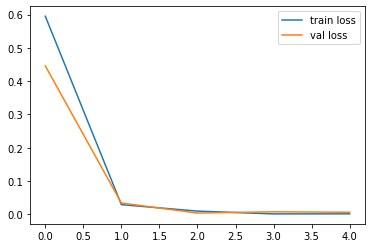

<Figure size 432x288 with 0 Axes>

In [22]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

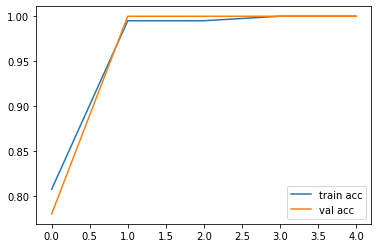

<Figure size 432x288 with 0 Axes>

In [24]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
model.save('facefeatures_new_model.h5')